<a href="https://colab.research.google.com/github/asr9876/my_daily_ml_works/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd

In [50]:
from sklearn.datasets import load_iris

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('UK Regional Population Data.csv')

In [53]:
df

,Code,Name,Geography,Area (sq km),Estimated Population mid-2021,2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
0,K02000001,UNITED KINGDOM,Country,242740.8699,67026292,276.122814,63285145,260.710712,59113016,243.523128
1,K03000001,GREAT BRITAIN,Country,228947.9193,65121729,284.439052,61470827,268.492621,57424178,250.817645
2,K04000001,ENGLAND AND WALES,Country,151046.9877,59641829,394.856130,56170927,371.877175,52359978,346.646953
3,E92000001,ENGLAND,Country,130310.4699,56536419,433.859375,53107169,407.543377,49449746,379.476385
4,E12000001,NORTH EAST,Region,8580.7865,2646772,308.453310,2596441,302.587764,2540090,296.020650
...,...,...,...,...,...,...,...,...,...,...
415,N09000006,Fermanagh and Omagh,Local Government District,2835.9389,116926,41.230084,113501,40.022371,105751,37.289590
416,N09000007,Lisburn and Castlereagh,Local Government District,503.5760,149272,296.423976,135280,268.638696,124585,247.400591
417,N09000008,Mid and East Antrim,Local Government District,1044.5278,139127,133.196072,135365,129.594445,127452,122.018772
418,N09000009,Mid Ulster,Local Government District,1823.0343,150598,82.608429,139011,76.252542,119112,65.337224


In [54]:
df.Name.value_counts().sum()

420

In [55]:
df.Geography.value_counts()

Non-metropolitan District    181
Unitary Authority             81
Metropolitan District         36
London Borough                33
Council Area                  32
County                        24
Local Government District     11
Region                         9
Country                        7
Metropolitan County            6
Name: Geography, dtype: int64

In [56]:
df.isnull().sum()

Code                             0
Name                             0
Geography                        0
Area (sq km)                     0
Estimated Population mid-2021    0
2021 people per sq. km           0
Estimated Population mid-2011    0
2011 people per sq. km           0
Estimated Population mid-2001    0
2001 people per sq. km           0
dtype: int64

In [57]:
df['Geography'].map({'Non-metropolitan District' :  '0',
'Unitary Authority':'1',
'Metropolitan District':'2',
'London Borough':'3',
'Council Area':'4',
'County':'5',
'Local Government District':'6',
'Region':'7',
'Country':'8',
'Metropolitan County':'9'} )

0      8
1      8
2      8
3      8
4      7
      ..
415    6
416    6
417    6
418    6
419    6
Name: Geography, Length: 420, dtype: object

In [62]:
df.drop(['Name','Geography'],inplace = True, axis = 1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area (sq km)                   420 non-null    float64
 1   Estimated Population mid-2021  420 non-null    int64  
 2   2021 people per sq. km         420 non-null    float64
 3   Estimated Population mid-2011  420 non-null    int64  
 4   2011 people per sq. km         420 non-null    float64
 5   Estimated Population mid-2001  420 non-null    int64  
 6   2001 people per sq. km         420 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 23.1 KB


In [71]:
X = df.drop(['Estimated Population mid-2021'],axis = 1)
y = df['Estimated Population mid-2021']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y , test_size = 0.30 ,random_state = 42
)

In [73]:
X_train

,Area (sq km),2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
29,731.7608,91.800490,70627,96.516512,69251,94.636116
140,30.8507,2555.468758,76895,2492.488015,74596,2417.967826
392,160.4387,478.064208,81220,506.236962,84150,524.499388
118,1155.7321,82.692174,89352,77.312035,79631,68.900916
114,35.6902,2867.173622,93085,2608.138929,85584,2397.969190
...,...,...,...,...,...,...
71,1307.9377,125.468514,158683,121.323057,151467,115.805975
106,591.7966,166.082401,85699,144.811579,76818,129.804734
270,79.6916,1718.800978,125852,1579.237962,116257,1458.836314
348,739.4356,157.261836,109406,147.958795,103964,140.599127


In [74]:
y_train

29      67176
140     78838
392     76700
118     95570
114    102330
        ...  
71     164105
106     98287
270    136974
348    116285
102    108063
Name: Estimated Population mid-2021, Length: 294, dtype: int64

In [75]:
# Doing Standardisation Process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

array([[-0.10121122, -0.61512293, -0.14255469, -0.60759687, -0.14173998,
        -0.61978017],
       [-0.14475791,  0.36174078, -0.14127299,  0.39376499, -0.14056846,
         0.46237308],
       [-0.13670676, -0.46196635, -0.1403886 , -0.43636009, -0.13847442,
        -0.41955997],
       ...,
       [-0.14172348,  0.02999547, -0.13126209,  0.01208526, -0.13143721,
         0.01563219],
       [-0.1007344 , -0.589167  , -0.13462502, -0.5860973 , -0.13413159,
        -0.59837168],
       [-0.12566721, -0.52480141, -0.13758819, -0.53061659, -0.13900308,
        -0.55126374]])

In [77]:
# in case you want to inverse the transform you have to do this
# scaler.inverse_transform(X_train)

In [78]:
from sklearn.linear_model import LinearRegression
#cross Validation
from sklearn.model_selection import cross_val_score

In [85]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [86]:
mse = cross_val_score(regression,X_train,y_train,scoring= 'neg_mean_squared_error',cv = 10 )

In [87]:
np.mean(mse)

-725027059.906347

In [88]:
## prediction
reg_pred = regression.predict(X_test)

In [89]:
reg_pred

array([1.29166150e+05, 8.41991563e+04, 1.47807530e+06, 6.18407291e+04,
       1.45125828e+05, 5.36018578e+04, 8.94457557e+05, 1.13028284e+05,
       5.46056702e+04, 5.75352961e+04, 9.46407557e+04, 8.10094898e+05,
       2.42817075e+05, 3.43999975e+05, 2.70703593e+05, 3.47780348e+05,
       3.27476883e+05, 9.20777370e+06, 9.40800795e+04, 3.39496789e+05,
       1.07536496e+05, 3.00355606e+05, 5.62062666e+05, 2.15142409e+05,
       1.12475247e+05, 7.30539326e+04, 1.42915852e+06, 1.13586320e+05,
       1.17440827e+05, 2.70345699e+05, 1.38948448e+05, 9.68145738e+04,
       9.29240297e+04, 1.51490547e+05, 1.29969990e+05, 6.51904901e+04,
       2.64397843e+05, 2.93764649e+05, 1.71801582e+05, 1.04263423e+05,
       8.98336870e+04, 1.42069129e+06, 1.19470315e+05, 2.94908108e+05,
       1.43205017e+05, 5.52484991e+06, 1.15029868e+06, 1.61449806e+05,
       3.70948244e+05, 2.12153282e+05, 3.18981912e+05, 1.12828325e+05,
       6.70627641e+07, 1.56982580e+05, 1.54331127e+05, 1.25308904e+05,
      

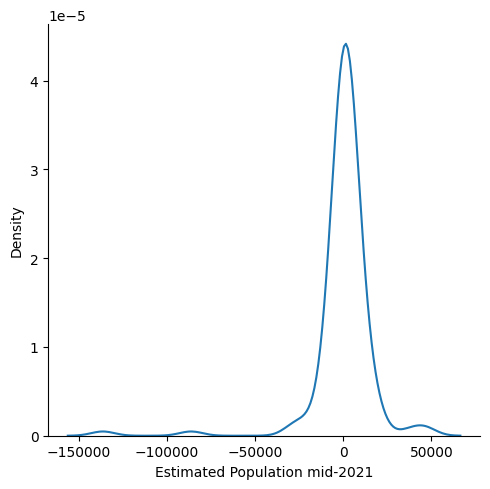

In [91]:
import seaborn as sns
sns.displot(reg_pred - y_test,kind = 'kde')

In [92]:
from sklearn.metrics import r2_score

In [93]:
score = r2_score(reg_pred,y_test)
score

0.9999950032083056